<a href="https://colab.research.google.com/github/hcyberpunk/First_Assignment/blob/main/mnsit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install hdbscan

In [ ]:
# Importing required libraries
import hdbscan
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs

from sklearn import decomposition
from sklearn.datasets import load_digits

import tensorflow as tf
import tensorflow_hub as hub
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from keras.datasets import cifar10 # subroutines for fetching the CIFAR-10 dataset
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values

from sklearn.utils import shuffle
from skimage import feature
from tensorflow import keras


In [ ]:
#loading dataset
digits = load_digits()
X = digits.data
y = digits.target


In [ ]:
X.shape

(1797, 64)

In [ ]:
#reducing the no. of features
pca = PCA(24) # we need 24 principal components.
X = pca.fit_transform(X)
X.shape


(1797, 24)

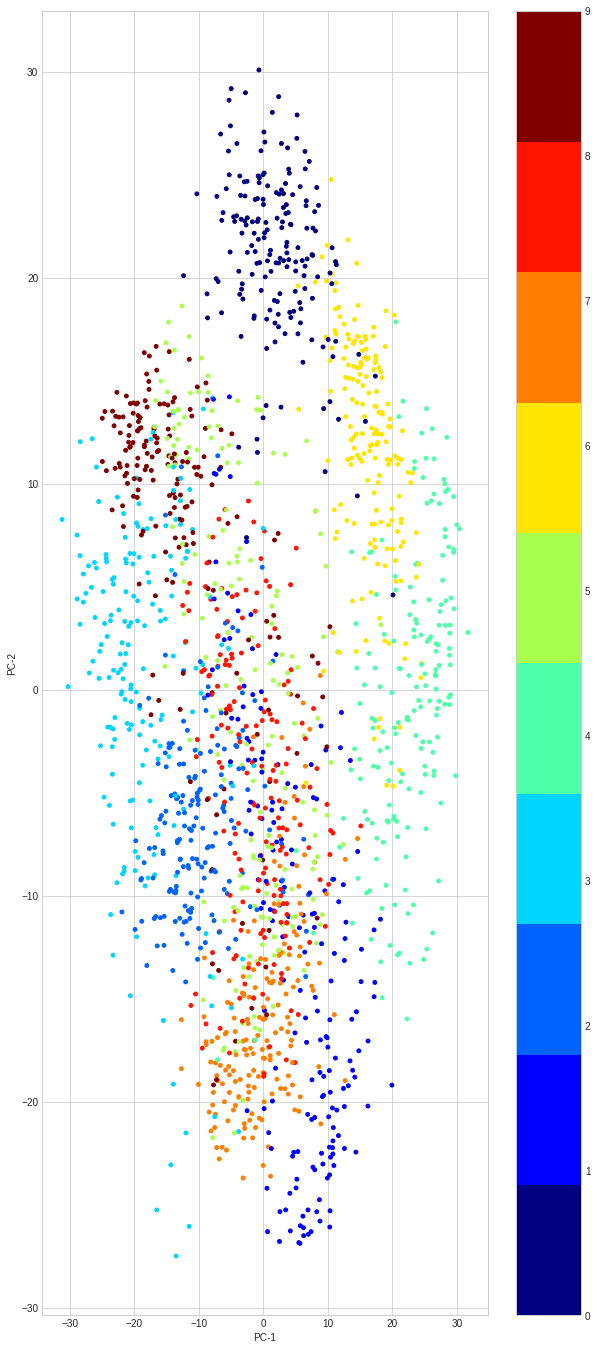

In [ ]:
#plot between PC1 and PC2
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,24))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(X[:, 0], X[:, 1], s = 15,
            cmap = c_map , c = y)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

In [ ]:
pip install umap_learn

In [ ]:
import umap

In [ ]:
#using umap for creating embedding
reducer = umap.UMAP(random_state=42)
reducer.fit(X)


UMAP(random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [ ]:
embedding = reducer.transform(X)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(1797, 2)

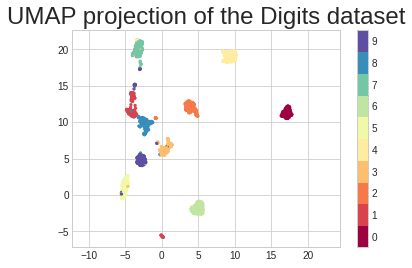

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

#plot of the same

In [ ]:
#utilising HDBSCAN for clustering
clusterer = hdbscan.HDBSCAN()
clusterer.fit(embedding)
clusterer.labels_

array([ 1, -1,  8, ..., 45,  5, -1])

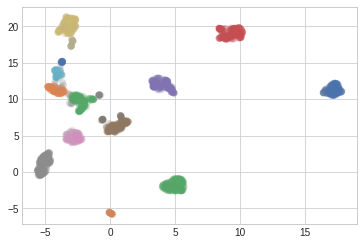

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(embedding)
color_palette = sns.color_palette('deep',50)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*embedding.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [ ]:
#score for representing the outliers
score = clusterer.probabilities_

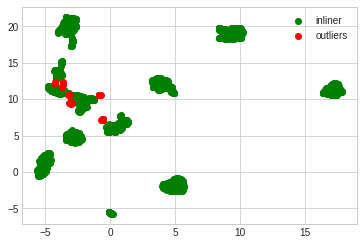

In [ ]:
mask_outliers = (score < 0.3)
mask_inliers = ~mask_outliers
plt.scatter(embedding[mask_inliers, 0], embedding[mask_inliers, 1], c= 'g', label='inliner')
plt.scatter(embedding[mask_outliers, 0], embedding[mask_outliers, 1], c= 'r', label='outliers')
plt.legend()

In [ ]:
sorted_scores = np.argsort(score)

[1 0 0 ... 0 2 0]


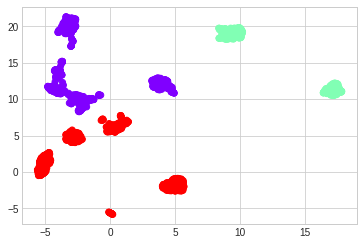

In [ ]:
#clustering using k-means
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_kmeans = KMeans(n_clusters=3)
X_kmeans.fit(embedding)
# Predicting the cluster labels
labels = X_kmeans.predict(embedding)
print(labels)
# Finding the final centroids
centroids = X_kmeans.cluster_centers_

plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap = 'rainbow')
plt.show()

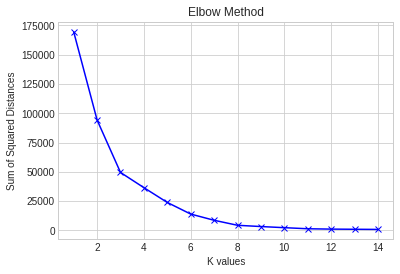

In [ ]:
#not required but just a verification of K calculated using elbow method
K = range(1,15)
sum_of_squared_distances = []
# Using Scikit Learn’s KMeans Algorithm to find sum of squared distances
for k in K:
    model = KMeans(n_clusters=k).fit(embedding)
    sum_of_squared_distances.append(model.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()